<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/c_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

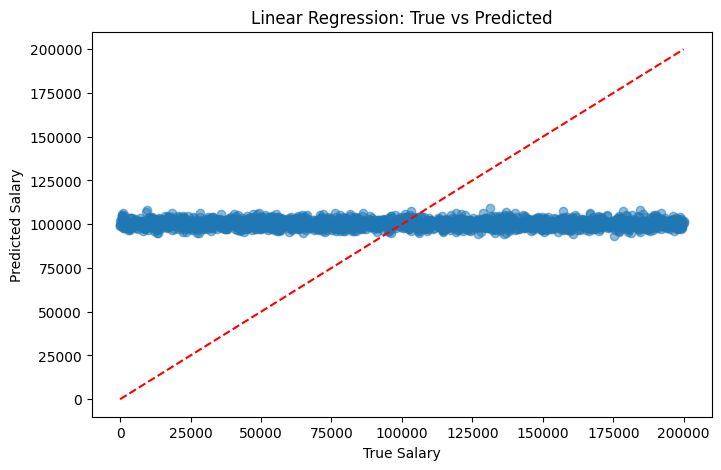

Linear Regression:
MSE: 3313474336.067242
R²: -0.0037019460577378815


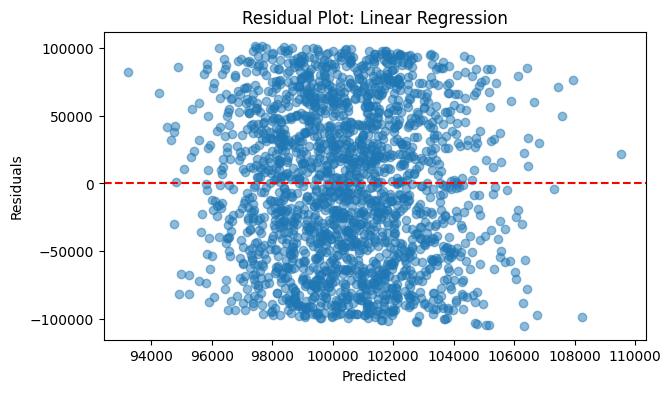

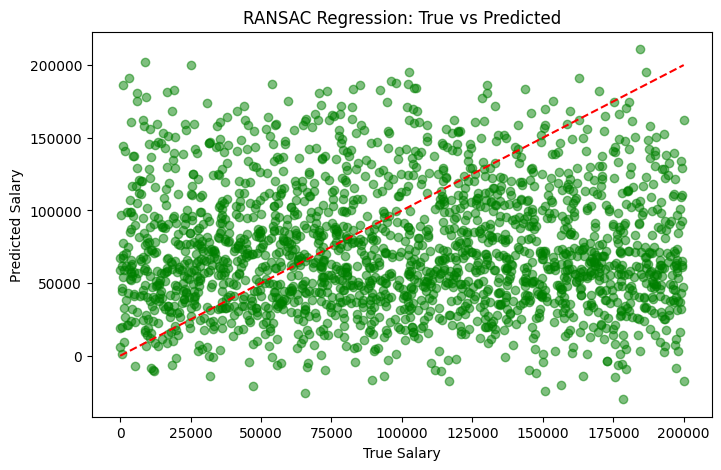

RANSAC:
MSE: 5817435889.468031
R²: -0.7621901156039907


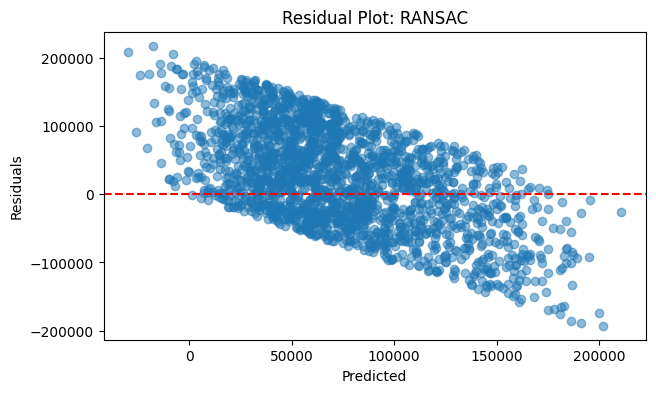

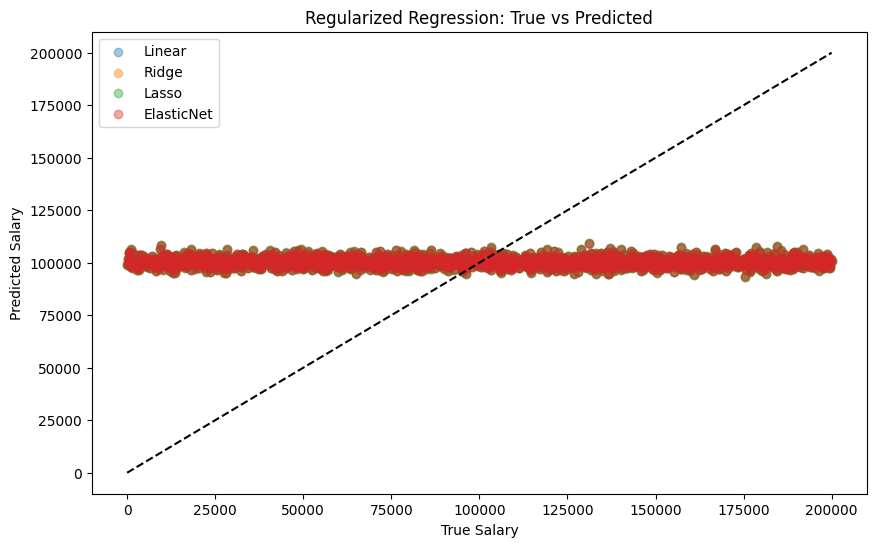

Ridge:
MSE: 3313472699.2186
R²: -0.0037014502313026387


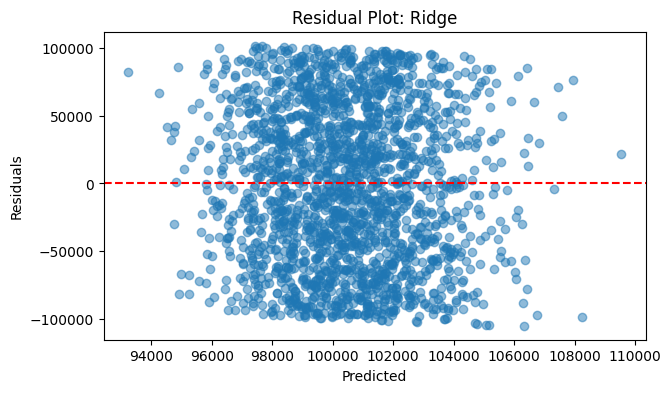

Lasso:
MSE: 3313473465.2097073
R²: -0.003701682261699535


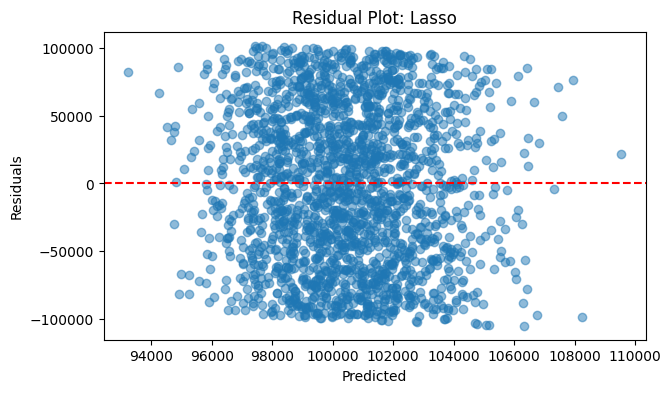

ElasticNet:
MSE: 3312858218.8407683
R²: -0.0035153147467661405


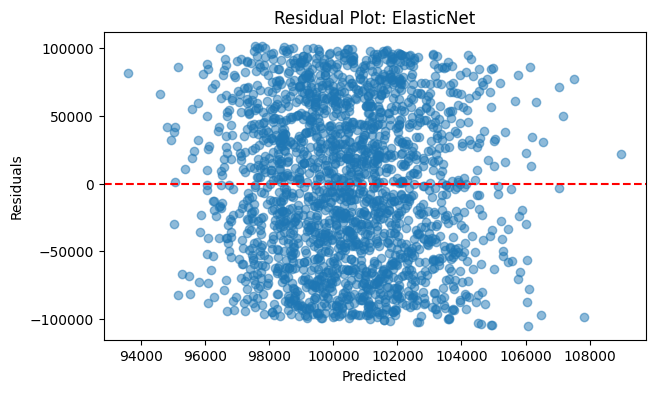

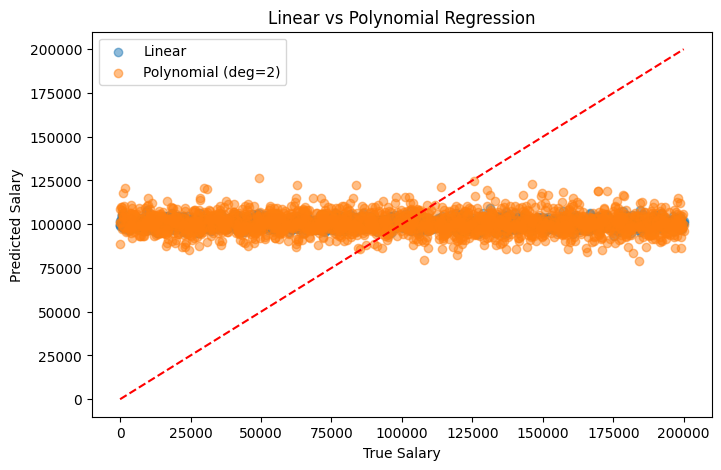

Polynomial (deg=2):
MSE: 3368170755.2255383
R²: -0.020270326187921794


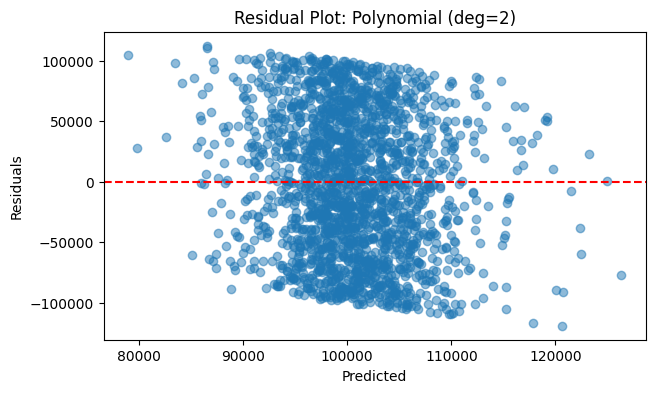

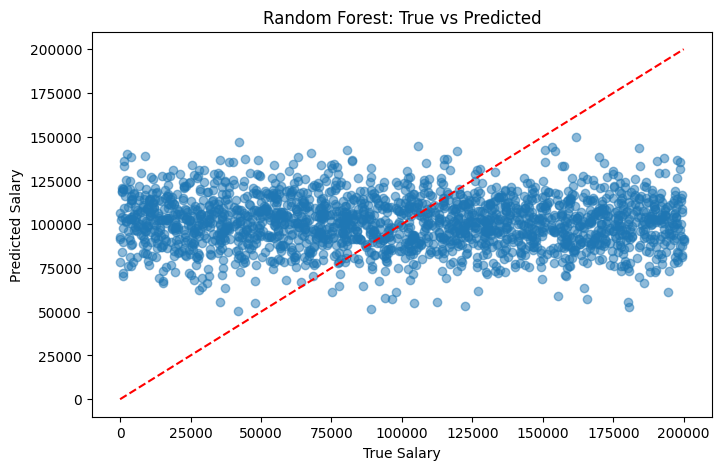

Random Forest:
MSE: 3596559941.707869
R²: -0.08945289640904441


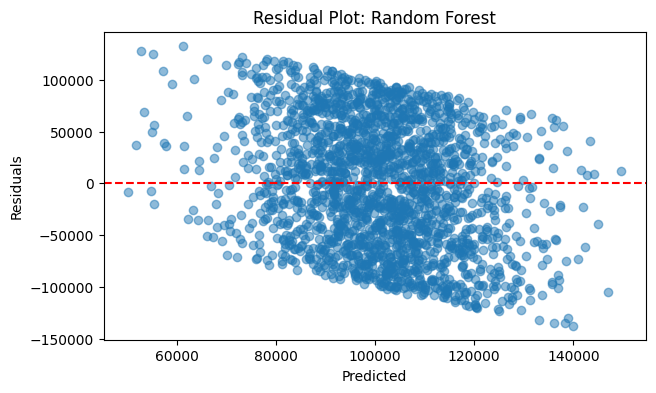

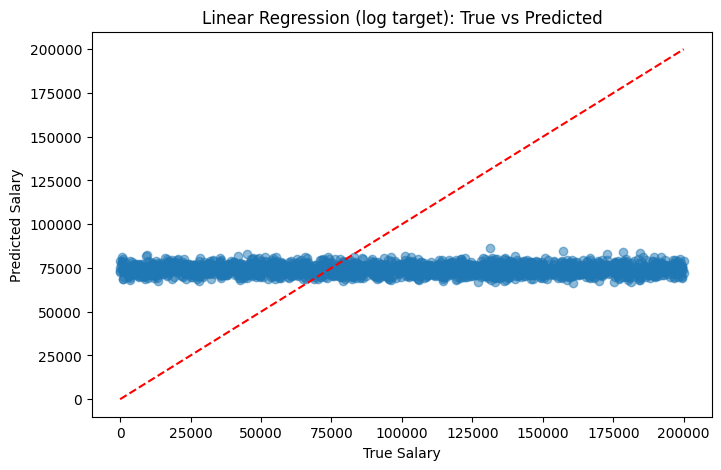

Linear Regression (log target):
MSE: 3914309611.0927916
R²: -0.1857041207053467


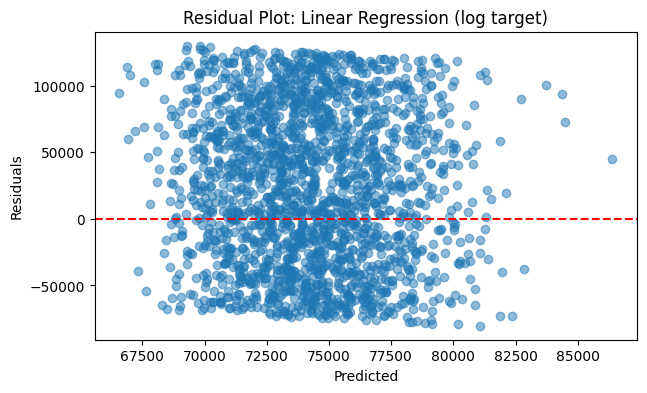

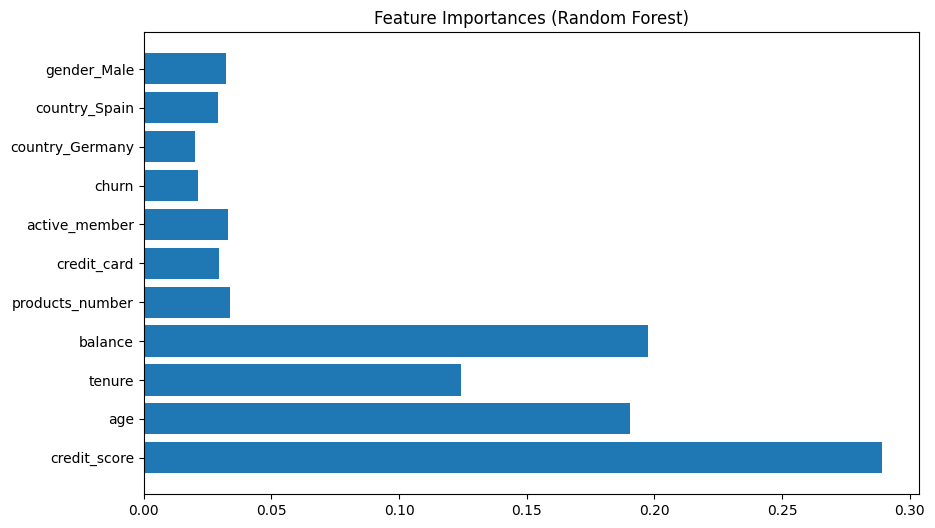

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Load your data
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/bank_customers_cleaned.csv"
data = pd.read_csv(url)

# 2. Prepare features and target
target = 'estimated_salary'
features = [col for col in data.columns if col not in ['customer_id', target]]

X = data[features]
y = data[target]

# 3. One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Define function to print metrics and plot residuals
def print_metrics(name, y_true, y_pred):
    print(f"{name}:")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))
    plt.figure(figsize=(7,4))
    plt.scatter(y_pred, y_true - y_pred, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot: {name}')
    plt.show()

# 7. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression: True vs Predicted')
plt.show()

print_metrics("Linear Regression", y_test, y_pred_lr)

# 8. RANSAC Regression
ransac = RANSACRegressor()
ransac.fit(X_train_scaled, y_train)
y_pred_ransac = ransac.predict(X_test_scaled)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_ransac, alpha=0.5, color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title('RANSAC Regression: True vs Predicted')
plt.show()

print_metrics("RANSAC", y_test, y_pred_ransac)

# 9. Regularized Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, label='Linear', alpha=0.4)
plt.scatter(y_test, y_pred_ridge, label='Ridge', alpha=0.4)
plt.scatter(y_test, y_pred_lasso, label='Lasso', alpha=0.4)
plt.scatter(y_test, y_pred_elastic, label='ElasticNet', alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.title('Regularized Regression: True vs Predicted')
plt.show()

print_metrics("Ridge", y_test, y_pred_ridge)
print_metrics("Lasso", y_test, y_pred_lasso)
print_metrics("ElasticNet", y_test, y_pred_elastic)

# 10. Polynomial Regression (degree=2)
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, label='Linear', alpha=0.5)
plt.scatter(y_test, y_pred_poly, label='Polynomial (deg=2)', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.title('Linear vs Polynomial Regression')
plt.show()

print_metrics("Polynomial (deg=2)", y_test, y_pred_poly)

# 11. Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title('Random Forest: True vs Predicted')
plt.show()

print_metrics("Random Forest", y_test, y_pred_rf)

# 12. Log-transform the target (optional)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

lr.fit(X_train_scaled, y_train_log)
y_pred_log = lr.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # Transform back

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression (log target): True vs Predicted')
plt.show()

print_metrics("Linear Regression (log target)", y_test, y_pred)

# 13. Feature Importance (for Random Forest)
importances = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title('Feature Importances (Random Forest)')
plt.show()


Линейная регрессия:
MSE: 3.226338255868214
R²: 0.9402877892004072

RANSAC:
MSE: 3.226338255868214
R²: 0.9402877892004072


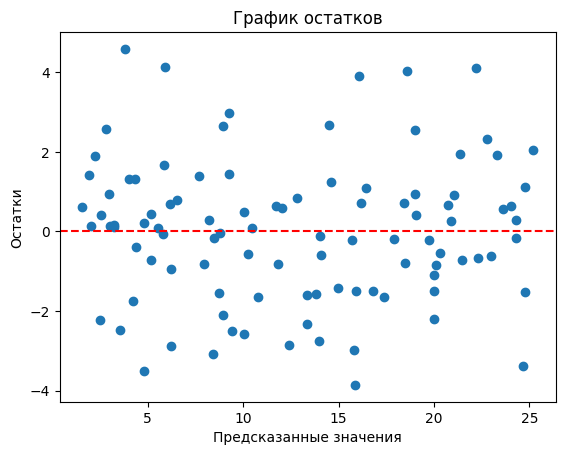

In [4]:
print("Линейная регрессия:")
print("MSE:", mean_squared_error(y, y_pred))
print("R²:", r2_score(y, y_pred))

print("\nRANSAC:")
print("MSE:", mean_squared_error(y, y_pred_ransac))
print("R²:", r2_score(y, y_pred_ransac))

# График остатков
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()


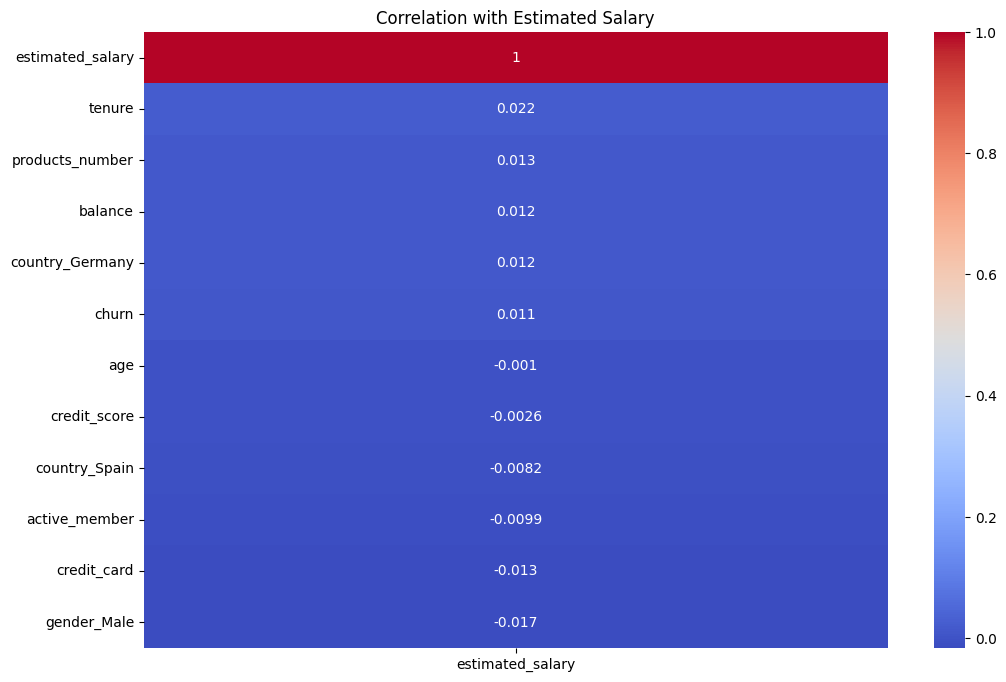

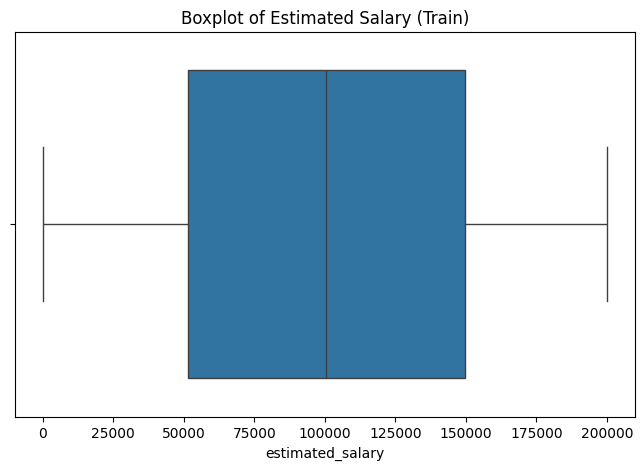

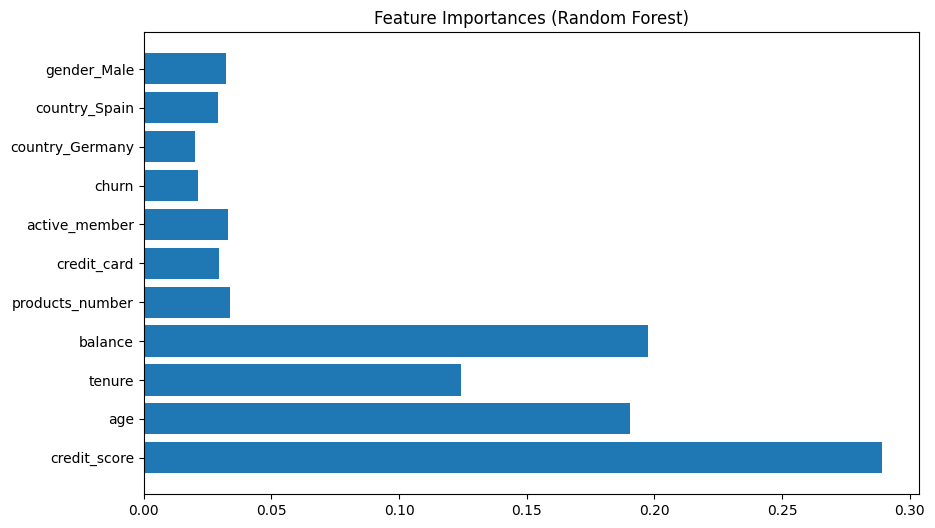

Selected Features: Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'churn', 'country_Spain',
       'gender_Male'],
      dtype='object')
Linear Regression CV R²: -0.0022262965060472874 ± 0.0016683991214596608


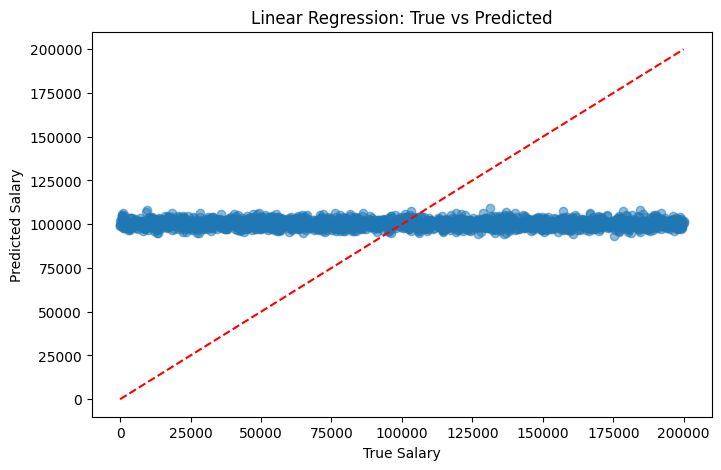

Linear Regression:
MSE: 3313474336.067242
R²: -0.0037019460577378815


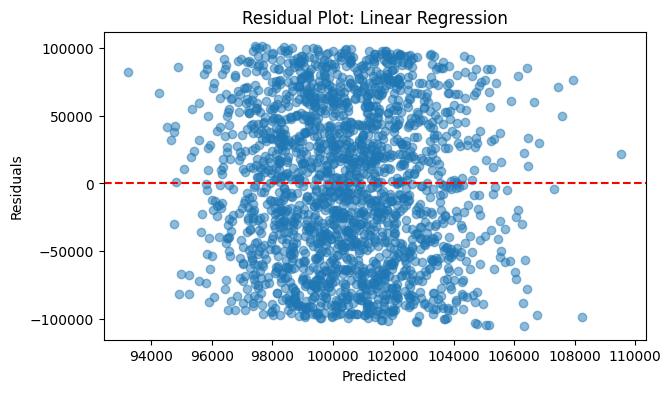

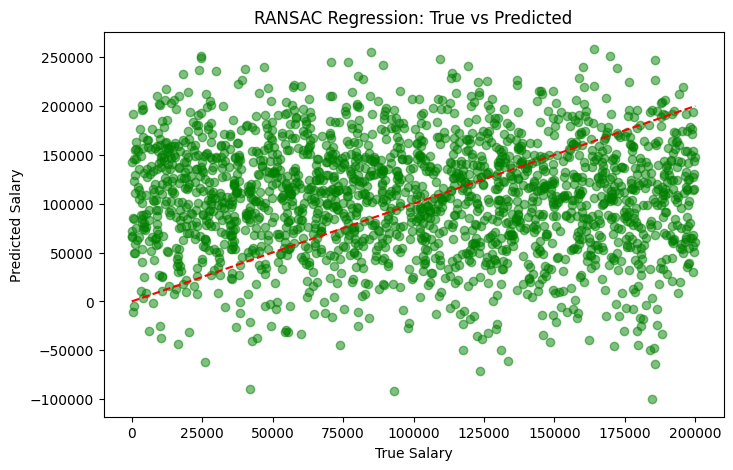

RANSAC:
MSE: 6890812550.740555
R²: -1.0873322879893954


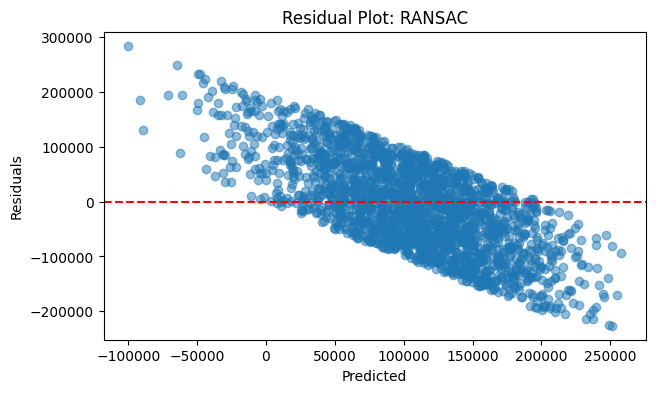

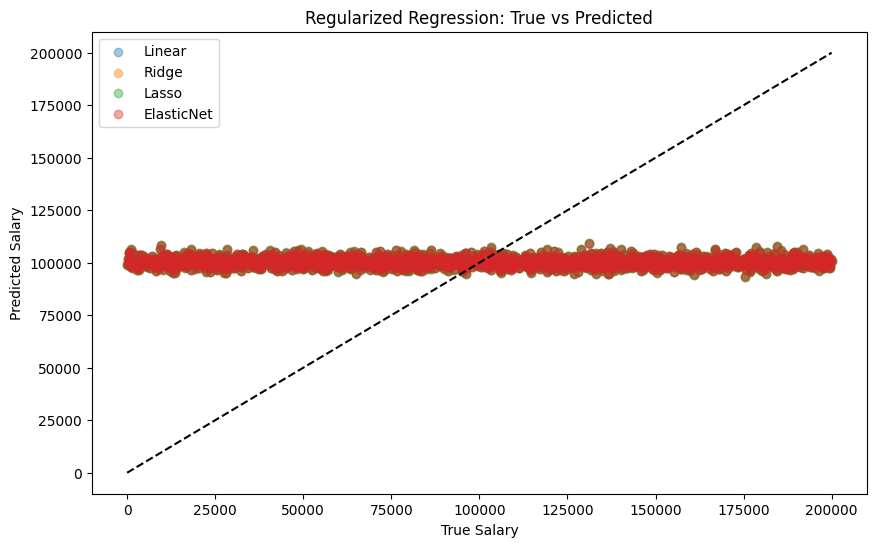

Ridge:
MSE: 3313472699.2186
R²: -0.0037014502313026387


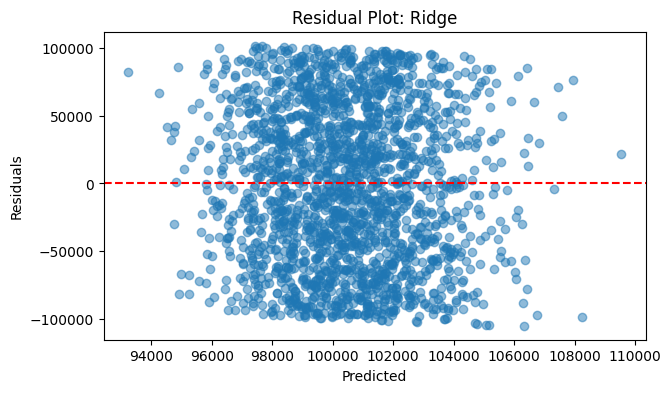

Lasso:
MSE: 3313473465.2097073
R²: -0.003701682261699535


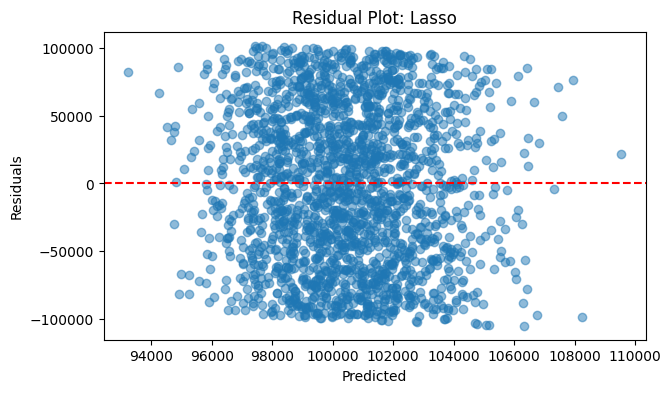

ElasticNet:
MSE: 3312858218.8407683
R²: -0.0035153147467661405


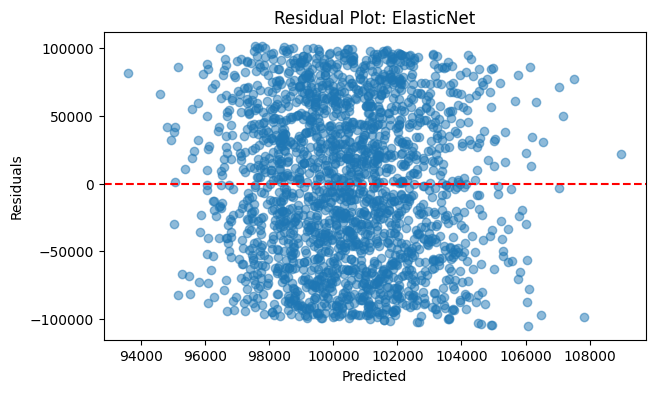

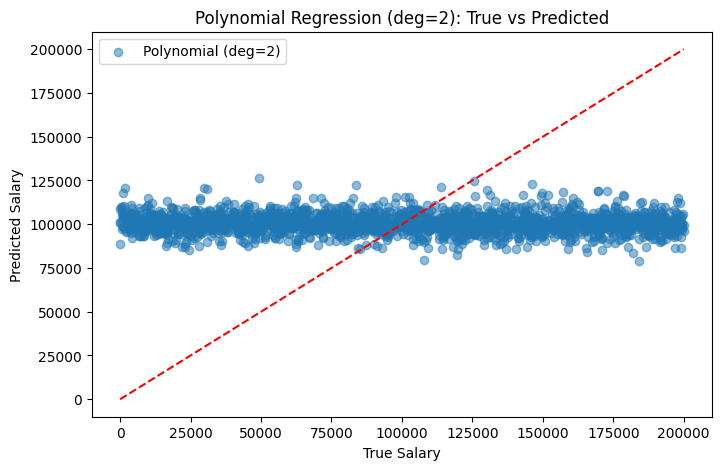

Polynomial (deg=2):
MSE: 3368170755.2255383
R²: -0.020270326187921794


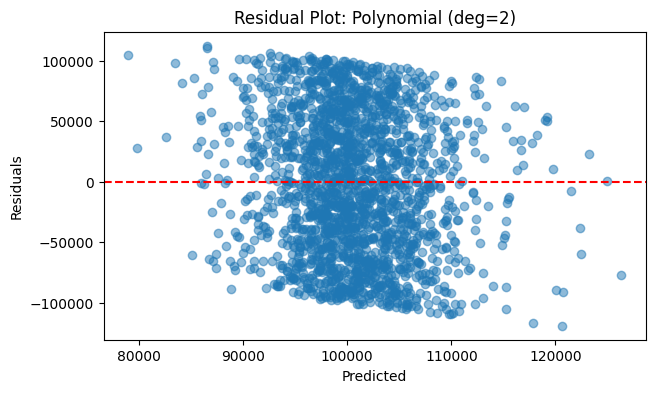

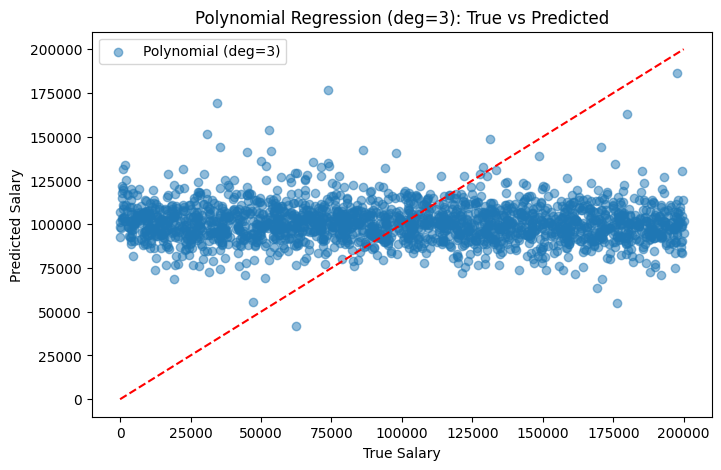

Polynomial (deg=3):
MSE: 3514839475.8321886
R²: -0.06469852009191301


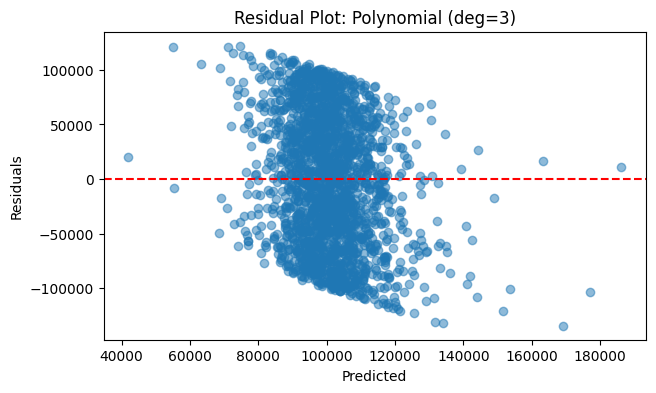

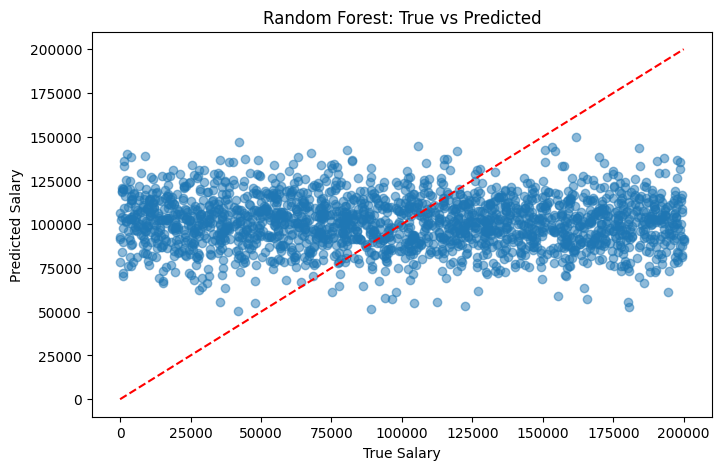

Random Forest:
MSE: 3596559941.707869
R²: -0.08945289640904441


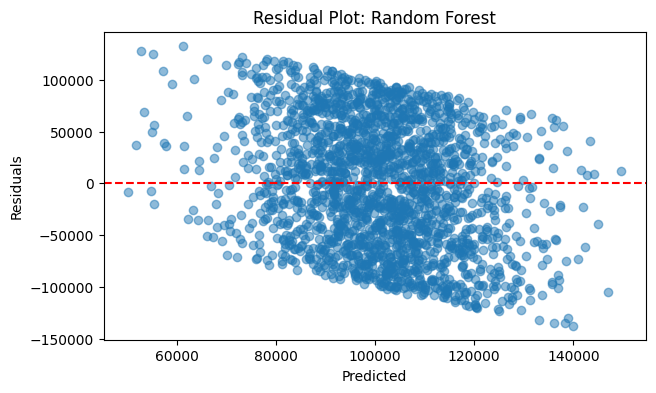

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold

# 1. Load your data
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/bank_customers_cleaned.csv"
data = pd.read_csv(url)

# 2. Prepare features and target
target = 'estimated_salary'
features = [col for col in data.columns if col not in ['customer_id', target]]

X = data[features]
y = data[target]

# 3. One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr()[['estimated_salary']].sort_values(by='estimated_salary', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlation with Estimated Salary')
plt.show()

# 7. Outlier Analysis and Handling
plt.figure(figsize=(8,5))
sns.boxplot(x=y_train)
plt.title('Boxplot of Estimated Salary (Train)')
plt.show()

# Optional: Cap outliers (example: cap at 99th percentile)
cap = y_train.quantile(0.99)
y_train_capped = np.where(y_train > cap, cap, y_train)
# Uncomment to use capped target
# y_train = y_train_capped

# 8. Feature Selection
# Example: Use Random Forest feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

importances = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title('Feature Importances (Random Forest)')
plt.show()

# Select top features (example: top 10)
selector = SelectFromModel(rf, threshold=-np.inf, max_features=10)
selector.fit(X_train_scaled, y_train)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Use only selected features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# 9. Define function to print metrics and plot residuals
def print_metrics(name, y_true, y_pred):
    print(f"{name}:")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))
    plt.figure(figsize=(7,4))
    plt.scatter(y_pred, y_true - y_pred, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot: {name}')
    plt.show()

# 10. Cross-Validation Example
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()
scores = cross_val_score(lr, X_train_scaled, y_train, cv=kf, scoring='r2')
print("Linear Regression CV R²:", scores.mean(), "±", scores.std())

# 11. Linear Regression
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression: True vs Predicted')
plt.show()

print_metrics("Linear Regression", y_test, y_pred_lr)

# 12. RANSAC Regression
ransac = RANSACRegressor()
ransac.fit(X_train_scaled, y_train)
y_pred_ransac = ransac.predict(X_test_scaled)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_ransac, alpha=0.5, color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title('RANSAC Regression: True vs Predicted')
plt.show()

print_metrics("RANSAC", y_test, y_pred_ransac)

# 13. Regularized Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, label='Linear', alpha=0.4)
plt.scatter(y_test, y_pred_ridge, label='Ridge', alpha=0.4)
plt.scatter(y_test, y_pred_lasso, label='Lasso', alpha=0.4)
plt.scatter(y_test, y_pred_elastic, label='ElasticNet', alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.title('Regularized Regression: True vs Predicted')
plt.show()

print_metrics("Ridge", y_test, y_pred_ridge)
print_metrics("Lasso", y_test, y_pred_lasso)
print_metrics("ElasticNet", y_test, y_pred_elastic)

# 14. Polynomial Regression (degrees 2 and 3)
for degree in [2, 3]:
    poly_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ])
    poly_pipeline.fit(X_train, y_train)
    y_pred_poly = poly_pipeline.predict(X_test)

    plt.figure(figsize=(8,5))
    plt.scatter(y_test, y_pred_poly, label=f'Polynomial (deg={degree})', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('True Salary')
    plt.ylabel('Predicted Salary')
    plt.legend()
    plt.title(f'Polynomial Regression (deg={degree}): True vs Predicted')
    plt.show()

    print_metrics(f"Polynomial (deg={degree})", y_test, y_pred_poly)

# 15. Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title('Random Forest: True vs Predicted')
plt.show()

print_metrics("Random Forest", y_test, y_pred_rf)

# 16. Hyperparameter Tuning for Random Forest and Elastic Net
# Example: Tune Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train_scaled, y_train)
print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Random Forest R²:", grid_rf.best_score_)

# Example: Tune Elastic Net
param_grid_en = {
    'alpha': [0.01, 0.1, 1.0],
    'l1_ratio': [0.2, 0.5, 0.8]
}
grid_en = GridSearchCV(ElasticNet(random_state=42), param_grid_en, cv=5, scoring='r2')
grid_en.fit(X_train_scaled, y_train)
print("Best Elastic Net Params:", grid_en.best_params_)
print("Best Elastic Net R²:", grid_en.best_score_)

# 17. Model Comparison Table
models = {
    'Linear': y_pred_lr,
    'Ridge': y_pred_ridge,
    'Lasso': y_pred_lasso,
    'ElasticNet': y_pred_elastic,
    'RANSAC': y_pred_ransac,
    'Random Forest': y_pred_rf,
    'Polynomial (deg=2)': poly_pipeline.predict(X_test) if 'poly_pipeline' in locals() else None,
    'Polynomial (deg=3)': poly_pipeline.predict(X_test) if 'poly_pipeline' in locals() and poly_pipeline.named_steps['poly'].degree == 3 else None
}

results = []
for name, y_pred in models.items():
    if y_pred is not None:
        results.append({
            'Model': name,
            'MSE': mean_squared_error(y_test, y_pred),
            'R²': r2_score(y_test, y_pred)
        })

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# 18. Error Analysis
for name, y_pred in models.items():
    if y_pred is not None:
        plt.figure(figsize=(8,5))
        plt.scatter(y_test, y_test - y_pred, alpha=0.5)
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel('True Salary')
        plt.ylabel('Prediction Error')
        plt.title(f'Error Plot: {name}')
        plt.show()

# 19. Log-transform the target (optional)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

lr.fit(X_train_scaled, y_train_log)
y_pred_log = lr.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # Transform back

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression (log target): True vs Predicted')
plt.show()

print_metrics("Linear Regression (log target)", y_test, y_pred)

# 20. Feature Importance (Permutation Importance)
result = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], result.importances_mean[sorted_idx])
plt.title('Permutation Feature Importance (Random Forest)')
plt.show()


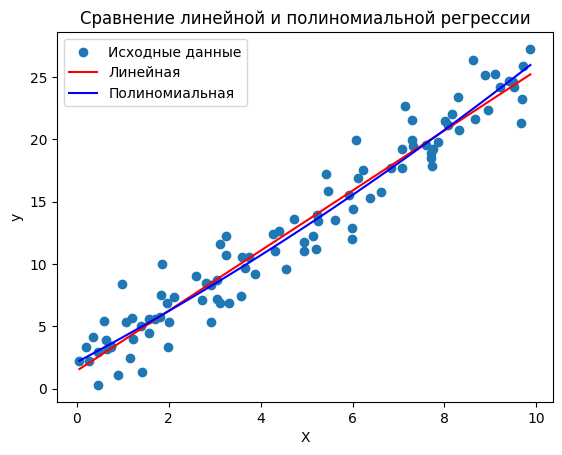

In [6]:
# Пример для множественной регрессии (если X — многомерный)
# Здесь для простоты используем полиномиальную регрессию по X
poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
poly.fit(X, y)
y_pred_poly = poly.predict(X)

plt.scatter(X, y, label='Исходные данные')
plt.plot(sorted(X.squeeze()), sorted(y_pred), color='red', label='Линейная')
plt.plot(sorted(X.squeeze()), sorted(y_pred_poly), color='blue', label='Полиномиальная')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Сравнение линейной и полиномиальной регрессии')
plt.show()
